In [46]:
import matplotlib.pyplot as pyplot
import numpy as np

In [47]:
x = np.arange(0, 25.5, step=1)

In [48]:
x, len(x)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]), 26)

In [49]:
y = np.linspace(0, 100, num=len(x))
y[0:21] = np.linspace(0, 25, num=21)
y[np.where(x==21)[0][0]] = 33
y[np.where(x==22)[0][0]] = 55
y[np.where(x==23)[0][0]] = 70
y[np.where(x==24)[0][0]] = 80
y[np.where(x==25)[0][0]] = 100

In [50]:
y, len(y)

(array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
         10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
         20.  ,  21.25,  22.5 ,  23.75,  25.  ,  33.  ,  55.  ,  70.  ,
         80.  , 100.  ]), 26)

In [51]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

[0.] [1. 0. 0. 0. 0. 0.]
2.715432720339284
0.9880397194904137


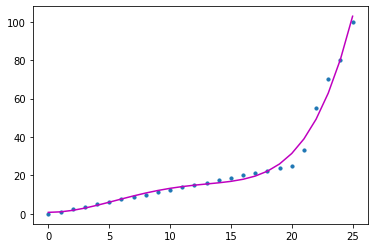

In [54]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)
print(x[0], x_poly[0])
model = LinearRegression(fit_intercept=False)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [55]:
model.coef_

array([[ 8.07487902e-01, -4.37301392e-02,  3.23392031e-01,
        -2.04133996e-02, -2.07015918e-04,  3.08070737e-05]])

In [56]:
model.intercept_

0.0

In [57]:
def f(a):
    result = model.coef_[0,0]*np.power(a, 0)
    s1 = "%f "%(model.coef_[0,0])
    s2 = "%f "%(model.coef_[0,0])
    for i in range(1, len(model.coef_[0])):
        result += model.coef_[0,i]*np.power(a, i)
        if model.coef_[0,i] > 0:
            s1 += "+"
            s2 += "+"
        
        s1 += "%f * x^%d "%(model.coef_[0,i], i)
        s2 += "%f * pow(x, %d) "%(model.coef_[0,i], i)
    print("%s"%(s1))
    print("//#define REACTION(x) (%s)"%(s2))
    return result

In [58]:
t = np.arange(-100, 100, step=1)

0.807488 -0.043730 * x^1 +0.323392 * x^2 -0.020413 * x^3 -0.000207 * x^4 +0.000031 * x^5 
//#define REACTION(x) (0.807488 -0.043730 * pow(x, 1) +0.323392 * pow(x, 2) -0.020413 * pow(x, 3) -0.000207 * pow(x, 4) +0.000031 * pow(x, 5) )


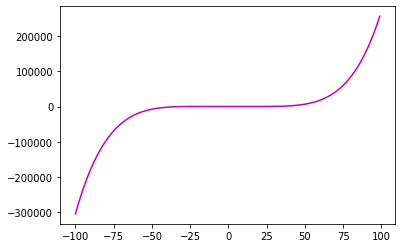

In [59]:
plt.plot(t, f(t), color='m')